<a href="https://colab.research.google.com/github/yorsyd/Proyek-Analisis-Data-Bike-Sharing-Dataset/blob/main/Proyek_Analisis_Data_Bike_Sharing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

\# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yoga Rusydi Arifin
- **Email:** yogarifn@gmail.com
- **ID Dicoding:** yogs23

## Menentukan Pertanyaan Bisnis

- Dicuaca seperti apa sepeda paling banyak disewa?
- Kapan sepeda paling sering disewa? Apakah siang atau malam?
- Bagaimana perbandingan penyewa kasual dengan registered pada tiap bulan?

## Import Semua Packages/Library yang Digunakan

Menyiapkan library yang akan digunakan

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Menghubungkan ke Google Drive

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mengambil data frame 'day.csv' dari Google Drive

In [37]:
day_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df_bikeSharing/day.csv')
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Mengambil data frame 'hour.csv' dari Google Drive

In [38]:
hour_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df_bikeSharing/hour.csv')
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Kita telah mendapatkan data frame peminjaman sepeda berdasarkan hari
- Kita telah mendapatkan data frame peminjaman sepeda berdasarkan jam

### Assessing Data

Melihat tipe data dari data frame day



In [39]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Melihat apakah ada duplikasi dari data frame day

In [40]:
print("Jumlah Duplikasi: ", day_df.duplicated().sum())

Jumlah Duplikasi:  0


Mendeskripsikan data frame day, apakah ada data yang aneh atau tidak

In [41]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Melihat tipe data dari data frame hour

In [42]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Melihat apakah ada duplikasi dari data frame hour

In [43]:
print("Jumlah Duplikasi: ", hour_df.duplicated().sum())

Jumlah Duplikasi:  0


Mendeskripsikan data frame hour, apakah ada data yang aneh atau tidak

In [44]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Hanya terdapat kesalahan tipe data pada kolom 'dteday' pada semua data frame. Maka nanti tipe data 'dteday' akan kita ubah pada proses selanjutnya
- Selain itu, baik duplikasi data maupun kosongnya nilai itu tidak ditemukan pada kedua data frame tersebut

### Cleaning Data

Mengganti tipe data atribut 'dteday' menjadi datetime

In [45]:
day_df['dteday'] = pd.to_datetime(day_df.dteday)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [46]:
hour_df['dteday'] = pd.to_datetime(hour_df.dteday)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Menghapus kolom 'instant' karena data pada kolom tersebut tidak diperlukan

In [47]:
day_df.drop('instant', axis=1, inplace=True)
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [48]:
hour_df.drop('instant', axis=1, inplace=True)
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Merubah nama atribut agar lebih mudah untuk dibaca

In [49]:
day_df = day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'holiday': 'is_holiday',
    'weekday': 'day_of_week',
    'temp' : 'temperature',
    'atemp' : 'feeling_temperature',
    'hum': 'humidity',
    'cnt': 'count'
})
day_df.head()

,date,season,year,month,is_holiday,day_of_week,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [50]:
hour_df = hour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'holiday': 'is_holiday',
    'weekday': 'day_of_week',
    'temp' : 'temperature',
    'atemp' : 'feeling_temperature',
    'hum': 'humidity',
    'cnt': 'count',
    'hr': 'hour'
})
hour_df.head()

,date,season,year,month,hour,is_holiday,day_of_week,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Menambahkan kolom "part_of_day" untuk mengkategorikan baris tersebut menjadi siang atau malam

In [51]:
siang = [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

for index, row in hour_df.iterrows():
  if row['hour'] in siang:
    hour_df.at[index, 'part_of_day'] = 'siang'
  else:
    hour_df.at[index, 'part_of_day'] = 'malam'

hour_df.head(12)

,date,season,year,month,hour,is_holiday,day_of_week,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count,part_of_day
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,malam
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,malam
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,malam
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,malam
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,malam
5,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,malam
6,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,malam
7,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,siang
8,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,siang
9,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,siang


**Insight:**
- Mengganti tipe data 'dteday' menjadi datetime
- Membuang kolom 'instant' karena data pada kolom tersebut tidak kita perlukan
- Merubah nama atribut agar lebih mudah dibaca dan dipahami
- Menambahkan kolom 'part_of_day' untuk memudahkan kita mengkategorikan data berdasarkan siang atau malam

## Exploratory Data Analysis (EDA)

### Di cuaca seperti apa sepeda paling banyak disewa?

In [52]:
hour_df.groupby('weathersit')['weathersit'].count()

,weathersit
weathersit,
1,11413
2,4544
3,1419
4,3


###Kapan sepeda paling sering disewa? Apakah siang atau malam?

In [53]:
hour_df.groupby("part_of_day")['part_of_day'].count()

,part_of_day
part_of_day,
malam,8641
siang,8738


###Bagaimana perbandingan penyewa kasual dengan registered pada tiap bulan?

In [54]:
day_df_groupby_month = day_df.groupby("month")
day_df_groupby_month[["casual", "registered"]].mean()

,casual,registered
month,,
1,194.225806,1982.112903
2,262.508772,2392.789474
3,716.838710,2975.419355
4,1013.366667,3471.533333
5,1214.274194,4135.500000
6,1231.766667,4540.600000
7,1260.596774,4303.080645
8,1161.919355,4502.500000
9,1172.050000,4594.466667


In [55]:
hour_df_groupby_month = hour_df.groupby("month")
hour_df_groupby_month[["casual", "registered"]].mean()

,casual,registered
month,,
1,8.426872,85.997901
2,11.158091,101.706935
3,30.172437,125.238289
4,42.311761,144.949200
5,50.594758,172.312500
6,51.323611,189.191667
7,52.524866,179.295027
8,48.840000,189.257627
9,48.937370,191.835769


**Insight:**
- Cuaca kategori 1 memiliki jumlah penyewa sepeda tertinggi, diikuti kategori 2, 3 dan 4
- Walau tidak memiliki perbedaan yang signifikan, sepeda lebih banyak disewa pada siang hari
- Penyewa registered cenderung lebih banyak dibandingkan penyewa kasual

## Visualization & Explanatory Analysis

### Pertanyaan 1: Dicuaca seperti apa sepeda paling banyak disewa?

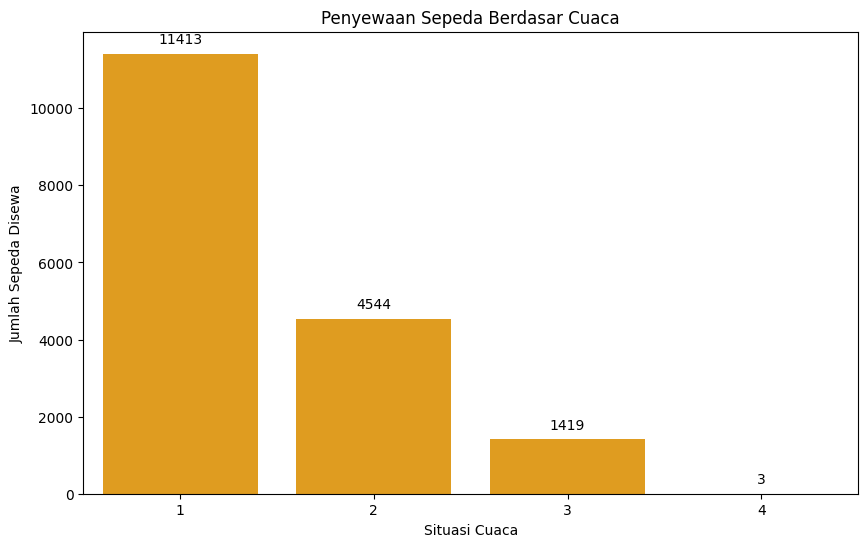

In [56]:
# Memasukkan 'hour_df.groupby('weathersit')['weathersit'].count()' ke dalam variabel weather_counts
weather_counts = hour_df.groupby('weathersit')['weathersit'].count()

# Membuat visualisasi dengan bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_counts.index, y=weather_counts.values, color='orange')

# Memberikan keterangan pada bar plot
plt.xlabel('Situasi Cuaca')
plt.ylabel('Jumlah Sepeda Disewa')
plt.title('Penyewaan Sepeda Berdasar Cuaca')

# Menambahkan jumlah setiap kategori pada bar plot
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### Pertanyaan 2: Kapan sepeda paling sering disewa? Apakah siang atau malam?

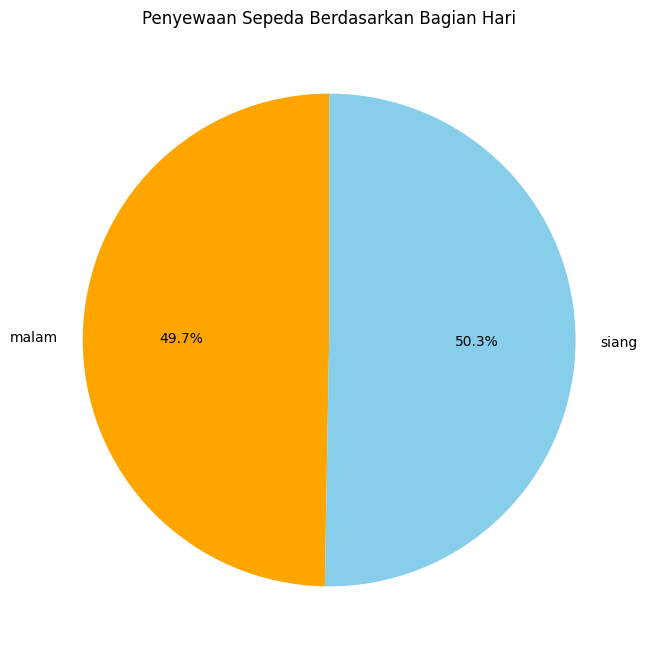

In [57]:
# Memasukkan 'hour_df.groupby('part_of_day')['part_of_day']' ke dalam variabel weather_counts
partOfDay_counts = hour_df.groupby('part_of_day')['part_of_day'].count()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(partOfDay_counts.values, labels=partOfDay_counts.index, autopct='%1.1f%%', startangle=90, colors=['orange', 'skyblue'])

# Mengatur judul
plt.title('Penyewaan Sepeda Berdasarkan Bagian Hari')

plt.show()

###Pertanyaan 3 : Bagaimana perbandingan penyewa kasual dengan registered pada tiap bulan?

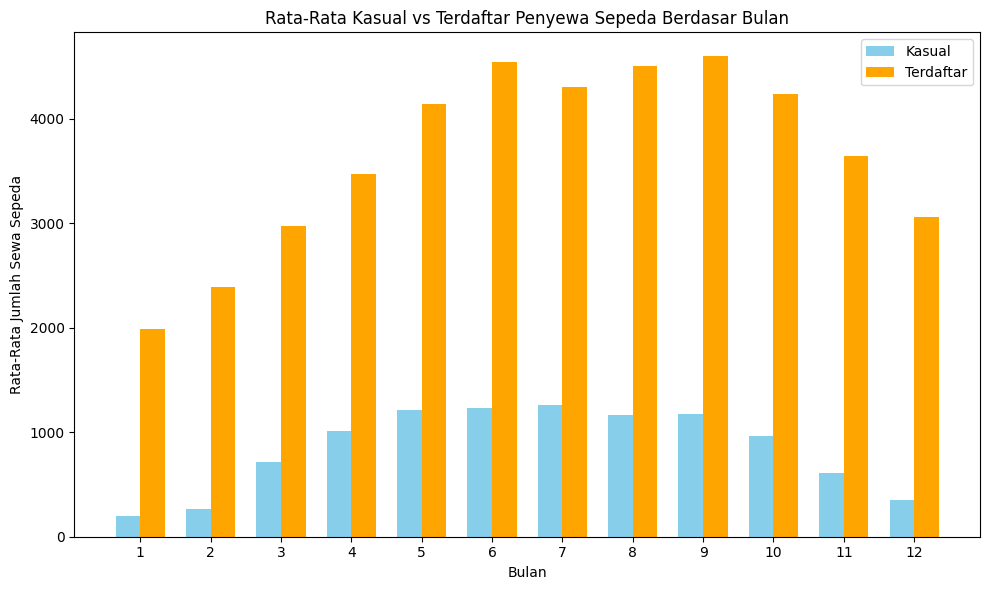

In [58]:
# Mengelompokkan berdasarkan bulan dan menghitung rata-rata pelanggan kasual dan terdaftar
day_df_groupby_month = day_df.groupby("month")[["casual", "registered"]].mean()

# Membuat figure dan axis
plt.figure(figsize=(10, 6))

# Menampung indeks bulan
months = day_df_groupby_month.index

# Mendapatkan rata-rata dari pelanggan kasual dan terdaftar
casual_means = day_df_groupby_month['casual']
registered_means = day_df_groupby_month['registered']

# Mengatur lebar bar
bar_width = 0.35
index = np.arange(len(months))

# Plot bar
plt.bar(index, casual_means, bar_width, label='Kasual', color='skyblue')
plt.bar(index + bar_width, registered_means, bar_width, label='Terdaftar', color='orange')

# Menambahkan judul dan label
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Jumlah Sewa Sepeda')
plt.title('Rata-Rata Kasual vs Terdaftar Penyewa Sepeda Berdasar Bulan')

# Kustomisasi x-ticks
plt.xticks(index + bar_width / 2, months)

# Menambahkan legend
plt.legend()

# Menampilkan bar plot
plt.tight_layout()
plt.show()

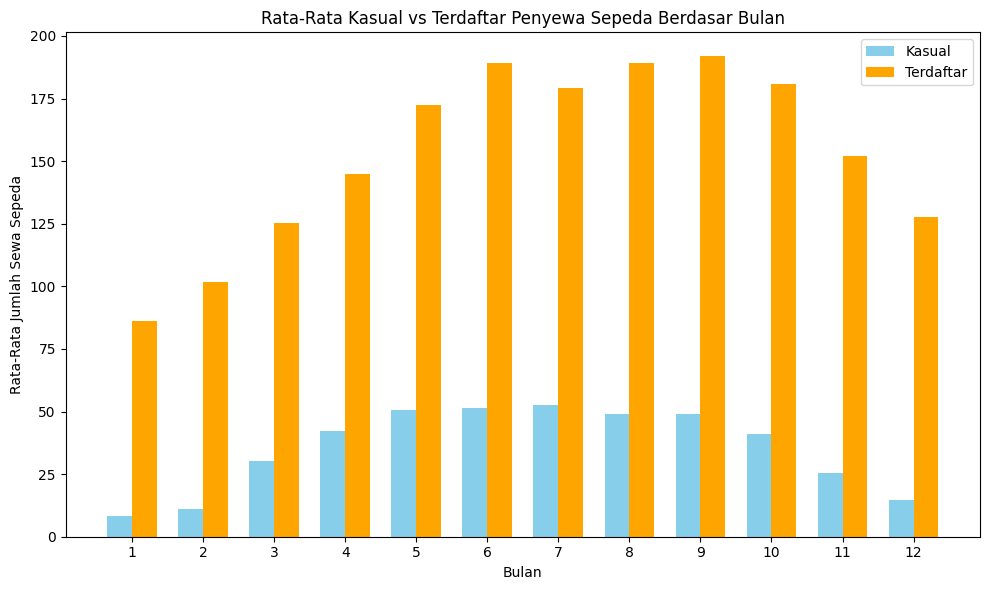

In [59]:
# Mengelompokkan berdasarkan bulan dan menghitung rata-rata pelanggan kasual dan terdaftar
hour_df_groupby_month = hour_df.groupby("month")[["casual", "registered"]].mean()

# Membuat figure dan axis
plt.figure(figsize=(10, 6))

# Menampung indeks bulan
months = hour_df_groupby_month.index

# Mendapatkan rata-rata dari pelanggan kasual dan terdaftar
casual_means = hour_df_groupby_month['casual']
registered_means = hour_df_groupby_month['registered']

# Mengatur lebar bar
bar_width = 0.35
index = np.arange(len(months))

# Plot bar
plt.bar(index, casual_means, bar_width, label='Kasual', color='skyblue')
plt.bar(index + bar_width, registered_means, bar_width, label='Terdaftar', color='orange')

# Menambahkan judul dan label
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Jumlah Sewa Sepeda')
plt.title('Rata-Rata Kasual vs Terdaftar Penyewa Sepeda Berdasar Bulan')

# Kustomisasi x-ticks
plt.xticks(index + bar_width / 2, months)

# Menambahkan legend
plt.legend()

# Menampilkan bar plot
plt.tight_layout()
plt.show()

**Insight:**
- Dapat melihat dengan dengan jelas perbandingan banyak pengguna disetiap  kategori cuaca. Terlihat dari visualisasi, kategori 1 menjadi jumlah penyewa terbanyak dan kategori 4 merupakan jumlah penyewa paling sedikit
- Pelanggan pada siang dan malam hari tidak memiliki perbedaan yang signifikan
- Pelanggan kasual terlihat lebih sedikit dibanding dengan pelanggan terdaftar


## Analisis Lanjutan (Opsional)

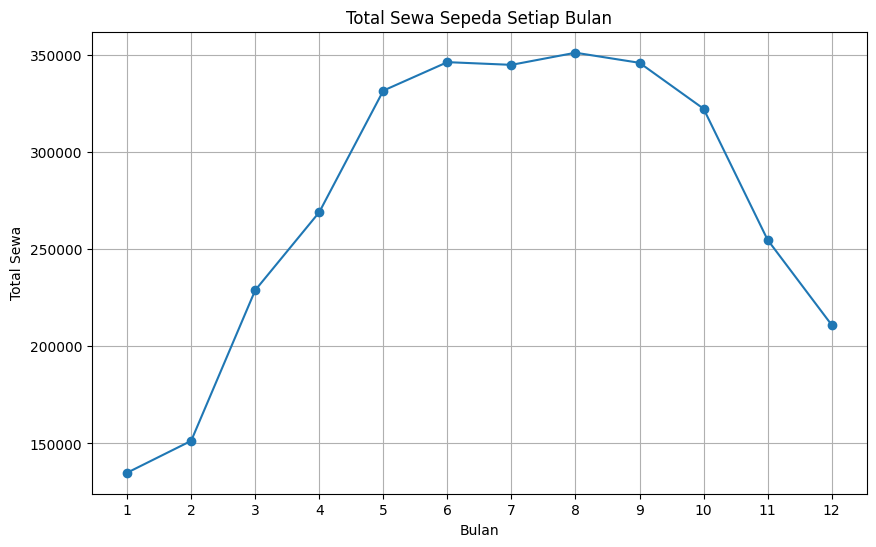

In [60]:
# Menghitung total sewa pada setiap bulan (casual + registered)
monthly_rentals = day_df.groupby('month')['count'].sum()

# Membuat line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_rentals.index, monthly_rentals.values, marker='o', linestyle='-')

# Kostumisasi line chart
plt.xlabel('Bulan')
plt.ylabel('Total Sewa')
plt.title('Total Sewa Sepeda Setiap Bulan')
plt.xticks(monthly_rentals.index)
plt.grid(True)

# Menampilkan chart
plt.show()

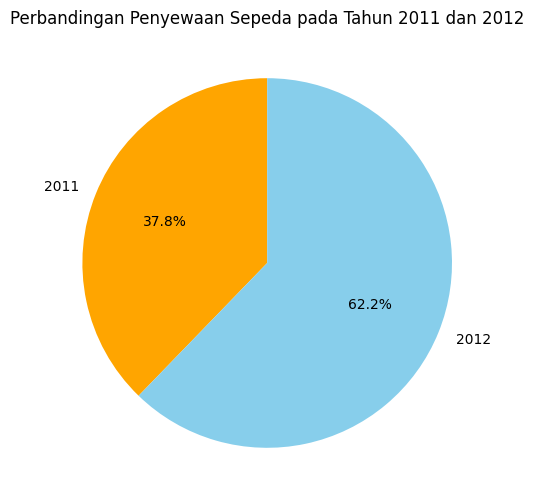

In [61]:
# Menghitung jumlah sewa pada setiap tahun
year_rentals = day_df.groupby('year')['count'].sum()

plt.figure(figsize=(6, 6))
plt.pie(year_rentals.values, labels=['2011', '2012'], autopct='%1.1f%%', startangle=90, colors=['orange', 'skyblue'])

# Menambahkan judul
plt.title('Perbandingan Penyewaan Sepeda pada Tahun 2011 dan 2012')

plt.show()

## Conclusion

**Pertanyaan:**
1.  Dicuaca seperti apa sepeda paling banyak disewa?
2.  Kapan sepeda paling sering disewa? Apakah siang atau malam?
3.  Bagaimana perbandingan penyewa kasual dengan registered pada tiap bulan?

**Kesimpulan Pertanyaan 1** : Sepeda lebih banyak disewa pada cuaca berkode 1 (Clear, Few clouds, Partly cloudy, Partly cloudy) yaitu sebanyak 11413 penyewa. Sedangkan pada cuaca berkode 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) menjadi cuaca dengan penyewa paling sedikit, dengan hanya total 3 penyewa

**Kesimpulan Pertanyaan 2** : Pada siang hari, sepeda paling banyak disewa dengan persentase 50.3%. Namun, dari persentase tersebut kita juga dapat mengetahui jika perbandingan jumlah penyewa sepeda pada siang dan malam hari tidak terlalu jauh perbedaannya. Dimana pada malam hari, sepeda di sewa dengan persentase 49.7%. Jadi, selisih banyaknya penyewa sepeda hanya sekitar 0.6% dari total penyewa sepeda.

**Kesimpulan Pertanyaan 3** : Penyewa terdaftar terlihat signifikan lebih banyak menyewa sepeda dibanding penyewa kasual disetiap bulannya. Berarti, penyewa sepeda kebanyakan adalah pelanggan yang benar-benar membutuhkan jasa ini karena mereka berlangganan dengan jasa tersebut.